<a href="https://colab.research.google.com/github/kiranbk527/Data6000/blob/main/Dementia_PHNs1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload: "Dementia PHN.csv"
# Optional (for 2022->2023 factor): also upload
# "Clean Prevalence data by age and sex.csv" and "Dementia Number 2010-2025.csv"


Saving Dementia PHN.csv to Dementia PHN.csv


In [ ]:
import pandas as pd
import numpy as np
import re

# --- Load PHN (2022) ---
phn_fname = "Dementia PHN.csv"
dfp = pd.read_csv(phn_fname, skiprows=1,
                  names=["State_or_Territory","PHN_name","Males","Females","Persons"])

# Clean numeric fields
for c in ["Males","Females","Persons"]:
    dfp[c] = pd.to_numeric(dfp[c].astype(str).str.replace(",","", regex=False).str.strip(), errors="coerce")

# Keep real rows
dfp = dfp[dfp["PHN_name"].notna()].dropna(subset=["Persons"]).copy()

# National & State totals
nat_2022 = dfp["Persons"].sum()
state_totals = (dfp.groupby("State_or_Territory")[["Males","Females","Persons"]]
                .sum().sort_values("Persons", ascending=False))

# PHN shares of national
dfp["Share_2022"] = dfp["Persons"] / nat_2022

# Gender mix (national)
female_share_nat = dfp["Females"].sum() / nat_2022
male_share_nat   = dfp["Males"].sum() / nat_2022

print("National 2022 total (Persons):", int(nat_2022))
print("National gender mix (2022):  Female = {:.1f}% | Male = {:.1f}%"
      .format(100*female_share_nat, 100*male_share_nat))
print("\nState totals (top 8):")
print(state_totals.head(8))


National 2022 total (Persons): 400339
National gender mix (2022):  Female = 62.8% | Male = 37.2%

State totals (top 8):
                      Males  Females   Persons
State_or_Territory                            
NSW                 48148.0  81502.0  129651.0
Vic                 37475.0  64725.0  102199.0
Qld                 29663.0  48255.0   77919.0
WA                  15009.0  24624.0   39634.0
SA                  12175.0  21270.0   33445.0
Tas                  3933.0   6424.0   10357.0
ACT                  2023.0   3510.0    5533.0
NT                    690.0    911.0    1601.0


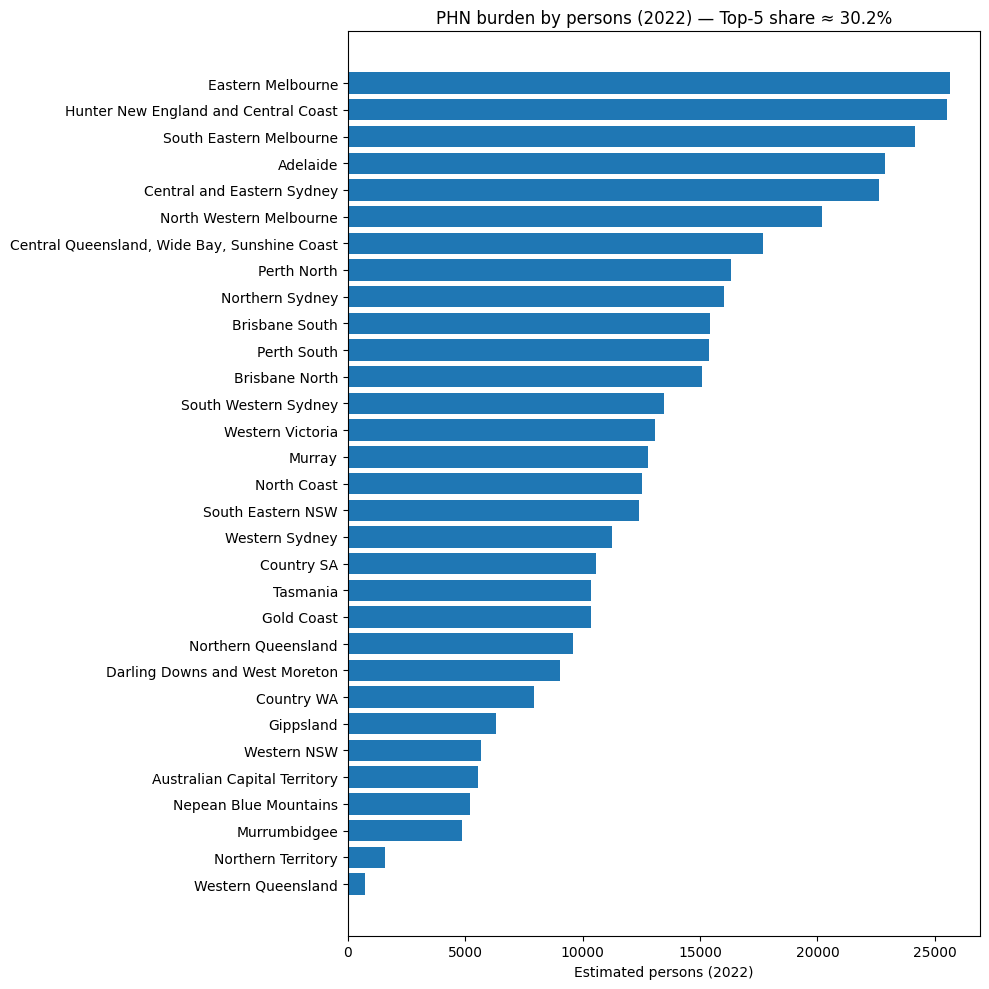

In [ ]:
import matplotlib.pyplot as plt

ranked = dfp.sort_values("Persons", ascending=True)
top5_share = ranked.tail(5)["Persons"].sum() / nat_2022

plt.figure(figsize=(10,10))
plt.barh(ranked["PHN_name"], ranked["Persons"])
plt.title("PHN burden by persons (2022) — Top-5 share ≈ {:.1f}%".format(100*top5_share))
plt.xlabel("Estimated persons (2022)")
plt.tight_layout(); plt.show()


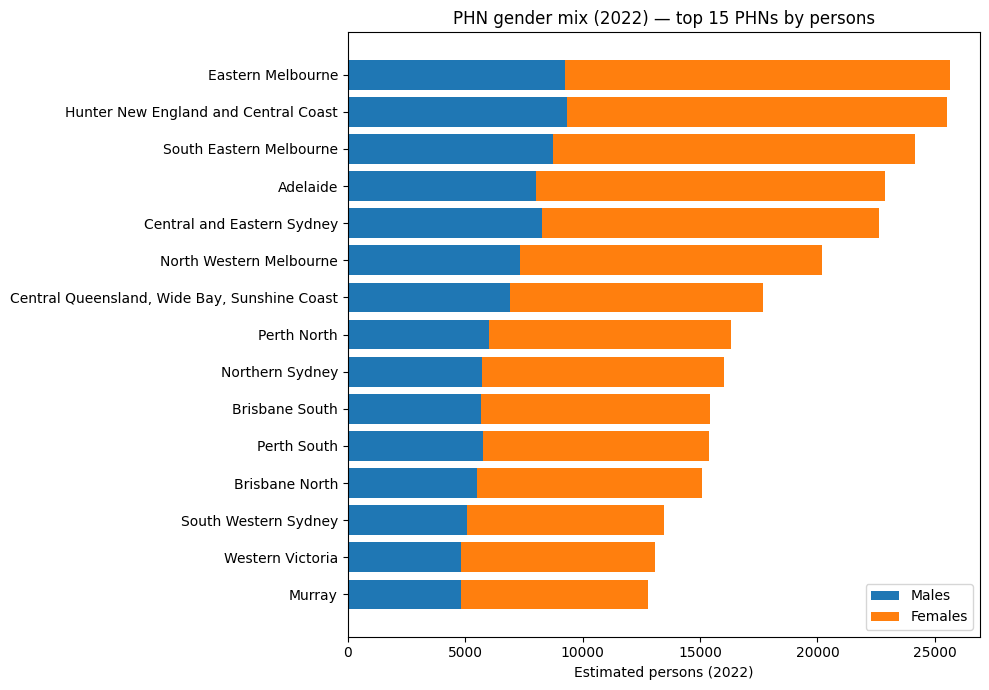

In [ ]:
topN = 15
top_phn = dfp.sort_values("Persons", ascending=False).head(topN).iloc[::-1]  # reverse for barh order

plt.figure(figsize=(10,7))
plt.barh(top_phn["PHN_name"], top_phn["Males"], label="Males")
plt.barh(top_phn["PHN_name"], top_phn["Females"], left=top_phn["Males"], label="Females")
plt.title("PHN gender mix (2022) — top {} PHNs by persons".format(topN))
plt.xlabel("Estimated persons (2022)")
plt.legend()
plt.tight_layout(); plt.show()


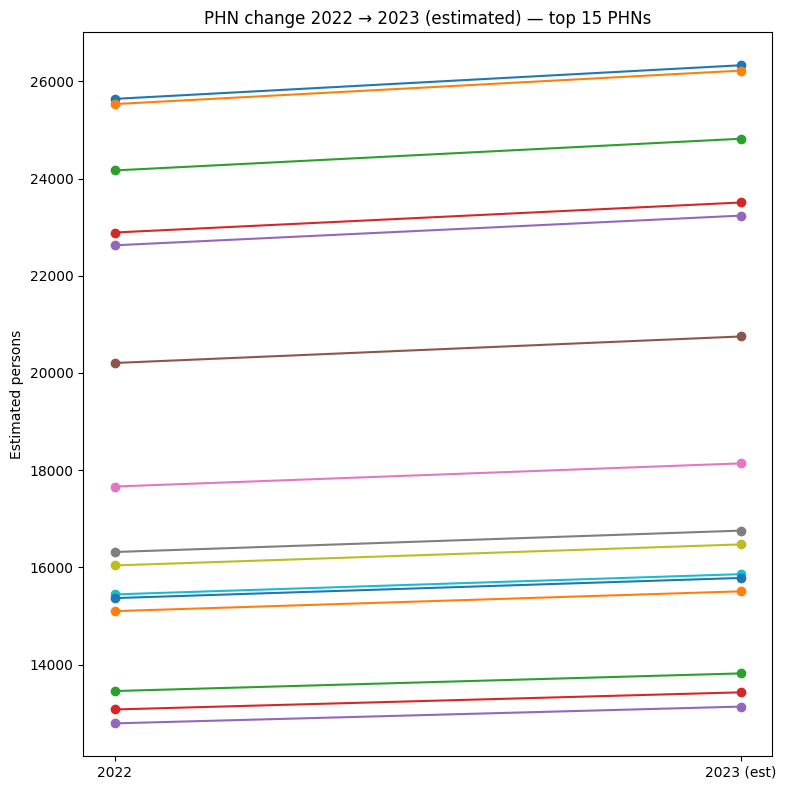

In [ ]:
# Prepare top 15 PHNs by 2022 Persons
topN = 15
sel = (dfp.sort_values("Persons", ascending=False)
          .head(topN)[["PHN_name","Persons","Persons_2023_est"]])

plt.figure(figsize=(8,8))
for _, r in sel.iterrows():
    plt.plot([0,1], [r["Persons"], r["Persons_2023_est"]], marker="o")
plt.xticks([0,1], ["2022", "2023 (est)"])
plt.title("PHN change 2022 → 2023 (estimated) — top {} PHNs".format(topN))
plt.ylabel("Estimated persons")
plt.tight_layout(); plt.show()


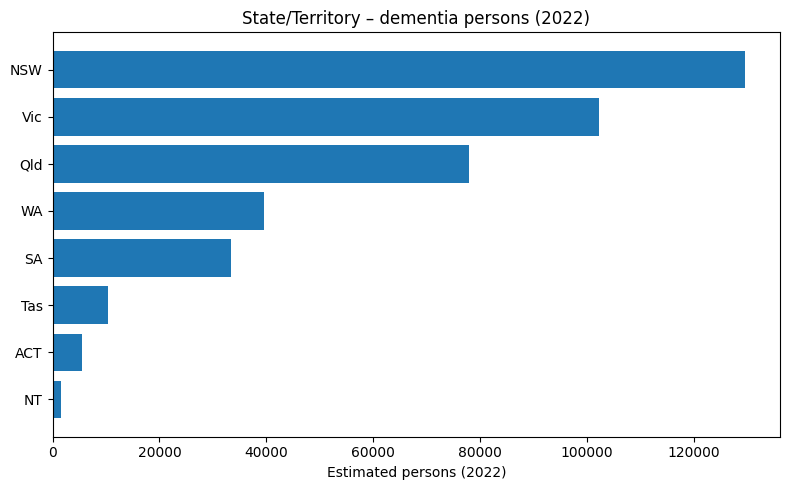

In [ ]:
st = state_totals.sort_values("Persons", ascending=True)
plt.figure(figsize=(8,5))
plt.barh(st.index, st["Persons"])
plt.title("State/Territory – dementia persons (2022)")
plt.xlabel("Estimated persons (2022)")
plt.tight_layout(); plt.show()


In [ ]:
print("National 2022 total (Persons):", int(nat_2022))
print("\nState totals (Persons) 2022:")
print(state_totals["Persons"].astype(int).to_string())

print("\nTop 5 PHNs by persons (2022):")
print(dfp.sort_values("Persons", ascending=False)
          .head(5)[["PHN_name","State_or_Territory","Persons","Share_2022"]]
          .assign(Persons=lambda x: x["Persons"].astype(int),
                  Share_2022=lambda x: (100*x["Share_2022"]).round(2))
          .to_string(index=False))

print("\nNational female share (2022): {:.1f}% | male: {:.1f}%"
      .format(100*female_share_nat, 100*male_share_nat))

print("\n2023 PHN estimates used growth factor =", round(growth_factor_2023,3),
      "(PHN_2023_est = PHN_2022 × factor)")


National 2022 total (Persons): 400339

State totals (Persons) 2022:
State_or_Territory
NSW    129651
Vic    102199
Qld     77919
WA      39634
SA      33445
Tas     10357
ACT      5533
NT       1601

Top 5 PHNs by persons (2022):
                            PHN_name State_or_Territory  Persons  Share_2022
                   Eastern Melbourne                Vic    25639        6.40
Hunter New England and Central Coast                NSW    25532        6.38
             South Eastern Melbourne                Vic    24167        6.04
                            Adelaide                 SA    22890        5.72
          Central and Eastern Sydney                NSW    22627        5.65

National female share (2022): 62.8% | male: 37.2%

2023 PHN estimates used growth factor = 1.027 (PHN_2023_est = PHN_2022 × factor)
